<a href="https://colab.research.google.com/github/asksandipd/AIMLAssignments/blob/master/Copy_of_KnowYourText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

### The objective of this notebook is for you to explore a given text and answer the various curious elements about the text. Such as :


1.   How many words the text might have?
2.   How many sentences? 
3.   What is the average, shortest and longest sentence? What could be that sentence?
4.   ...and so on



In [0]:
import nltk

In [4]:
nltk.download('gutenberg')
nltk.download('punkt')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
from nltk.corpus import gutenberg

## Looking up all the available texts

In [7]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

## Lets focus on Hamlet! 
## What are all the words (tokens is a generic term, as it encompasses everything that makes the text, including, words)

In [0]:
tokensFromCorpus=gutenberg.words(fileids='shakespeare-hamlet.txt')

## Total number of words used

In [9]:
len(tokensFromCorpus)

37360

## What about the distinct number of words?

In [10]:
len(set(tokensFromCorpus))

5447

## Curious about how often the author uses the same words?

In [11]:
len(set(tokensFromCorpus))/len(tokensFromCorpus)

0.14579764453961455

## Curious about how many times the word 'Hamlet' is used in the book 'Hamlet'?

In [13]:
tokensFromCorpus.count('Hamlet')

99

## What could be the frequecy distribution of the words? What are the most common words? Where does a word most often occur in the entire book? Frequency dist comes to rescue:

In [0]:
from nltk.probability import FreqDist

fdist1 = FreqDist(tokensFromCorpus)

In [17]:
fdist1.most_common(50)

[(',', 2892),
 ('.', 1886),
 ('the', 860),
 ("'", 729),
 ('and', 606),
 ('of', 576),
 ('to', 576),
 (':', 565),
 ('I', 553),
 ('you', 479),
 ('?', 459),
 ('a', 449),
 ('my', 435),
 ('in', 359),
 ('it', 354),
 ('Ham', 337),
 ('is', 304),
 (';', 298),
 ('not', 286),
 ('his', 266),
 ('And', 257),
 ('that', 257),
 ('your', 233),
 ('this', 232),
 ('me', 227),
 ('d', 223),
 ('with', 212),
 ('Lord', 211),
 ('him', 178),
 ('be', 176),
 ('King', 172),
 ('for', 169),
 ('haue', 161),
 ('he', 160),
 ('but', 146),
 ('so', 145),
 ('as', 142),
 ('The', 133),
 ('will', 131),
 ('on', 123),
 ('s', 122),
 ('That', 120),
 ('our', 118),
 ('-', 117),
 ('what', 116),
 ('are', 113),
 ('To', 109),
 ('shall', 104),
 ('But', 103),
 ('Hamlet', 99)]

## Lets extend the curiosity to the sentences...the number of sentences in Hamlet..



In [31]:
hamlet_sentences = gutenberg.sents(fileids="shakespeare-hamlet.txt")
len(hamlet_sentences)


3106

## Length of each sentence

In [23]:
sent_len = [len(_) for _ in hamlet_sentences]
print(sent_len)


[10, 3, 3, 7, 2, 5, 2, 9, 2, 4, 2, 2, 2, 1, 2, 7, 2, 11, 2, 17, 2, 6, 2, 4, 2, 4, 19, 5, 2, 6, 7, 2, 4, 2, 7, 2, 4, 2, 12, 2, 11, 3, 2, 2, 2, 7, 2, 4, 2, 6, 2, 13, 2, 4, 2, 62, 2, 8, 2, 29, 2, 14, 2, 42, 2, 10, 5, 2, 12, 2, 9, 2, 7, 3, 2, 12, 5, 2, 3, 2, 36, 2, 3, 2, 5, 2, 12, 4, 2, 8, 2, 4, 14, 7, 2, 19, 2, 7, 2, 44, 3, 2, 21, 2, 29, 2, 96, 2, 56, 113, 124, 4, 21, 18, 26, 18, 37, 5, 3, 2, 9, 2, 7, 2, 3, 2, 3, 2, 4, 3, 32, 2, 10, 2, 14, 60, 11, 2, 9, 70, 2, 12, 45, 36, 2, 20, 2, 3, 24, 2, 63, 86, 79, 5, 5, 17, 32, 72, 2, 12, 2, 8, 5, 12, 7, 6, 14, 19, 28, 8, 2, 58, 2, 6, 4, 2, 14, 2, 30, 2, 10, 2, 11, 2, 14, 2, 19, 37, 2, 6, 2, 11, 2, 3, 72, 35, 2, 53, 14, 64, 56, 58, 46, 2, 19, 2, 9, 2, 18, 56, 3, 2, 3, 2, 36, 6, 19, 5, 26, 56, 33, 15, 25, 6, 4, 35, 4, 20, 25, 12, 8, 2, 4, 2, 16, 2, 10, 2, 20, 1, 2, 3, 2, 12, 9, 2, 7, 2, 30, 15, 12, 2, 10, 2, 20, 2, 8, 2, 36, 9, 2, 5, 2, 9, 10, 2, 20, 2, 9, 2, 2, 2, 2, 7, 2, 5, 2, 26, 2, 6, 2, 28, 73, 47, 11, 2, 5, 2, 8, 2, 7, 2, 61, 2, 3, 2, 27, 2, 1

## Lets find the longest sentence...and of course print it out..

** Lets map the length of sentence with the sentence itself and print out the sentence with max key **

In [0]:
sentDictionary={len(sent):sent for i,sent in enumerate(hamlet_sentences)}

In [0]:
sentDictionary.keys()
maxKey=max(sentDictionary.keys())

In [35]:
sentDictionary[maxKey]

['To',
 'thine',
 'owne',
 'peace',
 ':',
 'if',
 'he',
 'be',
 'now',
 'return',
 "'",
 'd',
 ',',
 'As',
 'checking',
 'at',
 'his',
 'Voyage',
 ',',
 'and',
 'that',
 'he',
 'meanes',
 'No',
 'more',
 'to',
 'vndertake',
 'it',
 ';',
 'I',
 'will',
 'worke',
 'him',
 'To',
 'an',
 'exployt',
 'now',
 'ripe',
 'in',
 'my',
 'Deuice',
 ',',
 'Vnder',
 'the',
 'which',
 'he',
 'shall',
 'not',
 'choose',
 'but',
 'fall',
 ';',
 'And',
 'for',
 'his',
 'death',
 'no',
 'winde',
 'of',
 'blame',
 'shall',
 'breath',
 ',',
 'But',
 'euen',
 'his',
 'Mother',
 'shall',
 'vncharge',
 'the',
 'practice',
 ',',
 'And',
 'call',
 'it',
 'accident',
 ':',
 'Some',
 'two',
 'Monthes',
 'hence',
 'Here',
 'was',
 'a',
 'Gentleman',
 'of',
 'Normandy',
 ',',
 'I',
 "'",
 'ue',
 'seene',
 'my',
 'selfe',
 ',',
 'and',
 'seru',
 "'",
 'd',
 'against',
 'the',
 'French',
 ',',
 'And',
 'they',
 'ran',
 'well',
 'on',
 'Horsebacke',
 ';',
 'but',
 'this',
 'Gallant',
 'Had',
 'witchcraft',
 'in',
 "'"

## ...and so on. As you can see, there are several other such possibilities. But most importantly you can actually put these analyses to good use, as they can be treated as handcrafted features!!

## Practice Exercise (UNGRADED)

** Plot the frequence distribution of sentence lengths as a Histogram ! **

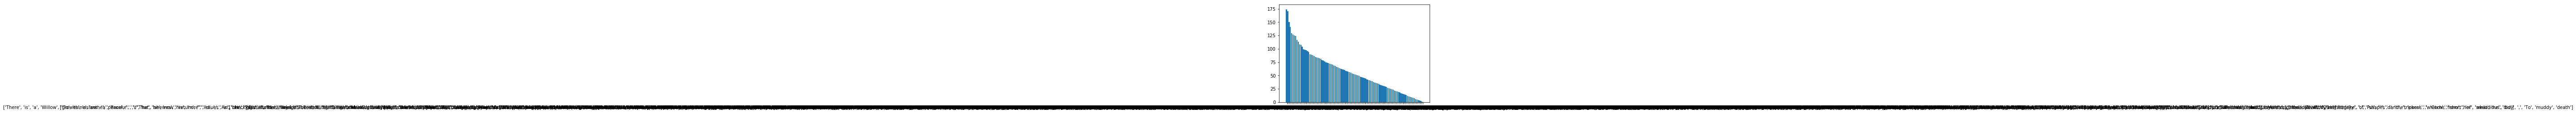

In [48]:
# Your code Here
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

#word_list = ['A', 'A', 'B', 'B', 'A', 'C', 'C', 'C', 'C']

#counts = Counter(word_list)

values, labels = zip(*sentDictionary.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35

plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)
plt.show()

